In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("wine+quality\\winequality-red.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

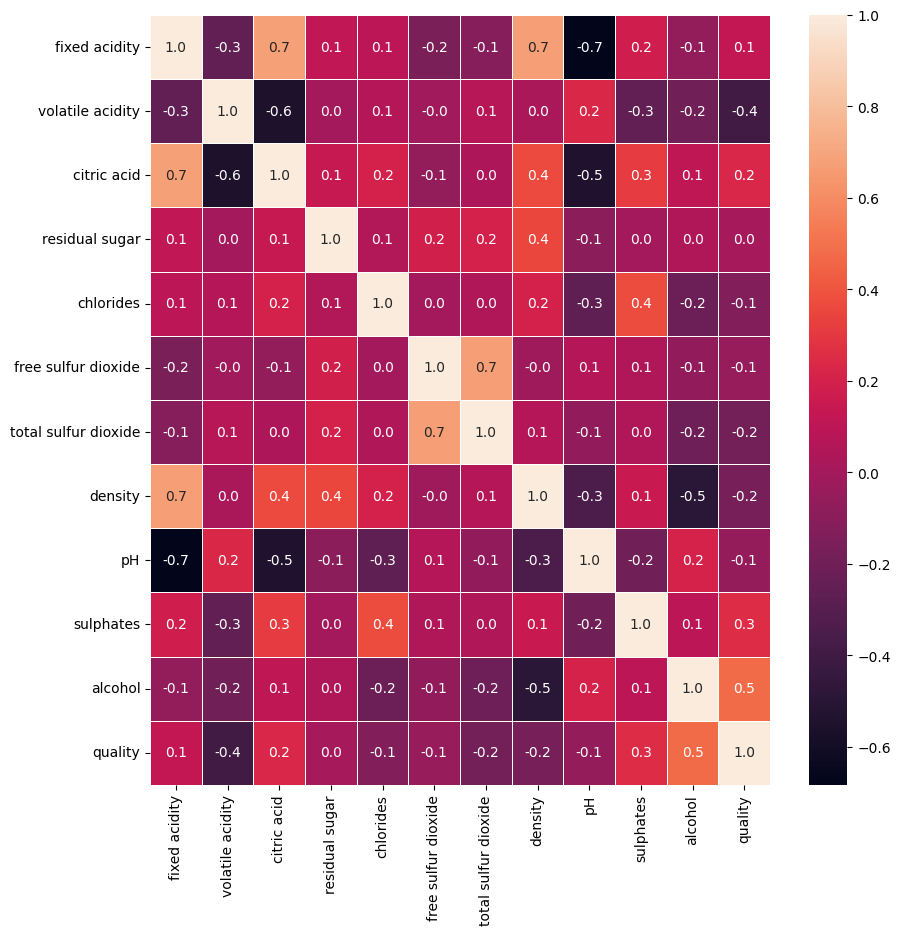

In [5]:
# Plot correlation  heatmap
import seaborn as sns
f,axis = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=axis)
plt.savefig('corr.svg', format='svg')

In [6]:
#Creating an object of standard scaler called scaler
scaler = StandardScaler()

In [7]:
X = df.drop(columns=['quality']) #input data
y = df['quality'] #output data
#split the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [9]:
X_test.shape, y_test.shape

((320, 11), (320,))

In [10]:
decisionTree = DecisionTreeClassifier()

In [11]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_predict = decisionTree.predict(X_test)

In [13]:
print(accuracy_score(y_test, y_predict))

0.575


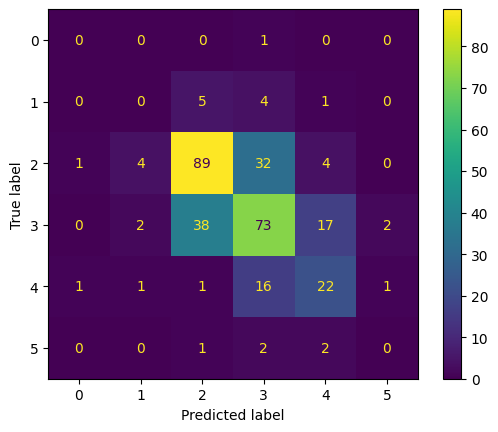

In [14]:
cm = confusion_matrix(y_test, y_predict)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.savefig("cm-decisionTree.svg", format='SVG')

In [15]:
print('Precision = ', precision_score(y_test, y_predict, average='weighted'))
print('Recall = ', recall_score(y_test, y_predict, average='weighted'))

Precision =  0.5678484065744647
Recall =  0.575


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.66      0.68      0.67       130
           6       0.57      0.55      0.56       132
           7       0.48      0.52      0.50        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.57      0.57      0.57       320



In [17]:
#Lets try knn algorithm and see if it improves the machine performance
from sklearn.neighbors import KNeighborsClassifier

accuracy_list = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_preds))


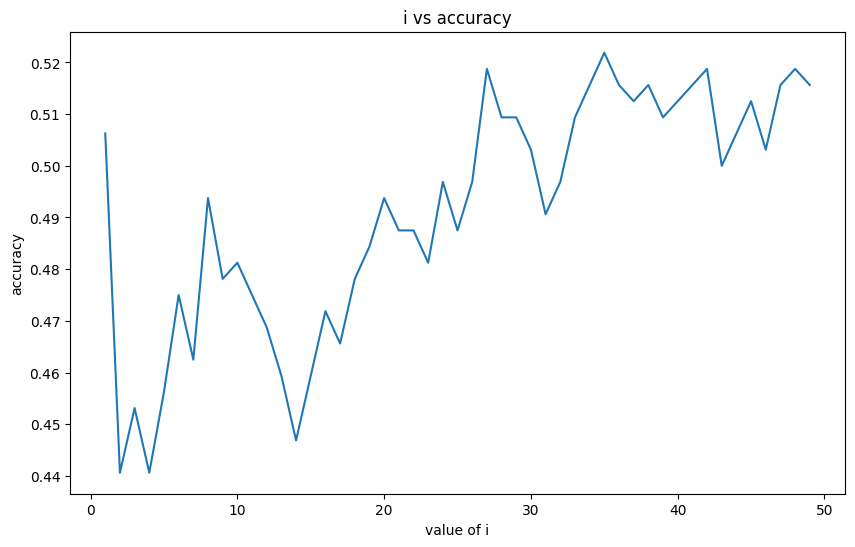

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy_list)
plt.xlabel("value of i")
plt.ylabel("accuracy")
plt.title("i vs accuracy")
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.55


In [21]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323690,0.530559,0.272471,2.555473,0.088448,15.876075,46.657154,0.996774,3.311650,0.660023,10.418100
std,1.724243,0.179275,0.195448,1.435790,0.049332,10.313517,32.941962,0.001856,0.154016,0.174605,1.052694
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [22]:
X_trained_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [23]:
df_temp = pd.DataFrame(X_trained_transformed)
df_temp.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.111091e-16,4.117981e-16,1.263866e-16,1.527750e-17,-1.041648e-16,-7.638751e-17,-7.569308e-17,2.559398e-14,-1.358309e-15,4.152703e-16,4.777692e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00


In [24]:
decisionTree.fit(X_trained_transformed, y_train)
y_predict = decisionTree.predict(X_test_transformed)
print(accuracy_score(y_test, y_predict))

0.5875


In [25]:
from sklearn.neural_network import  MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500,500,500))
mlp.fit(X_trained_transformed, y_train)
y_preds = mlp.predict(X_test_transformed)
print(accuracy_score(y_test, y_preds)*100)

66.25


c:\Users\achar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


<function matplotlib.pyplot.show(close=None, block=None)>

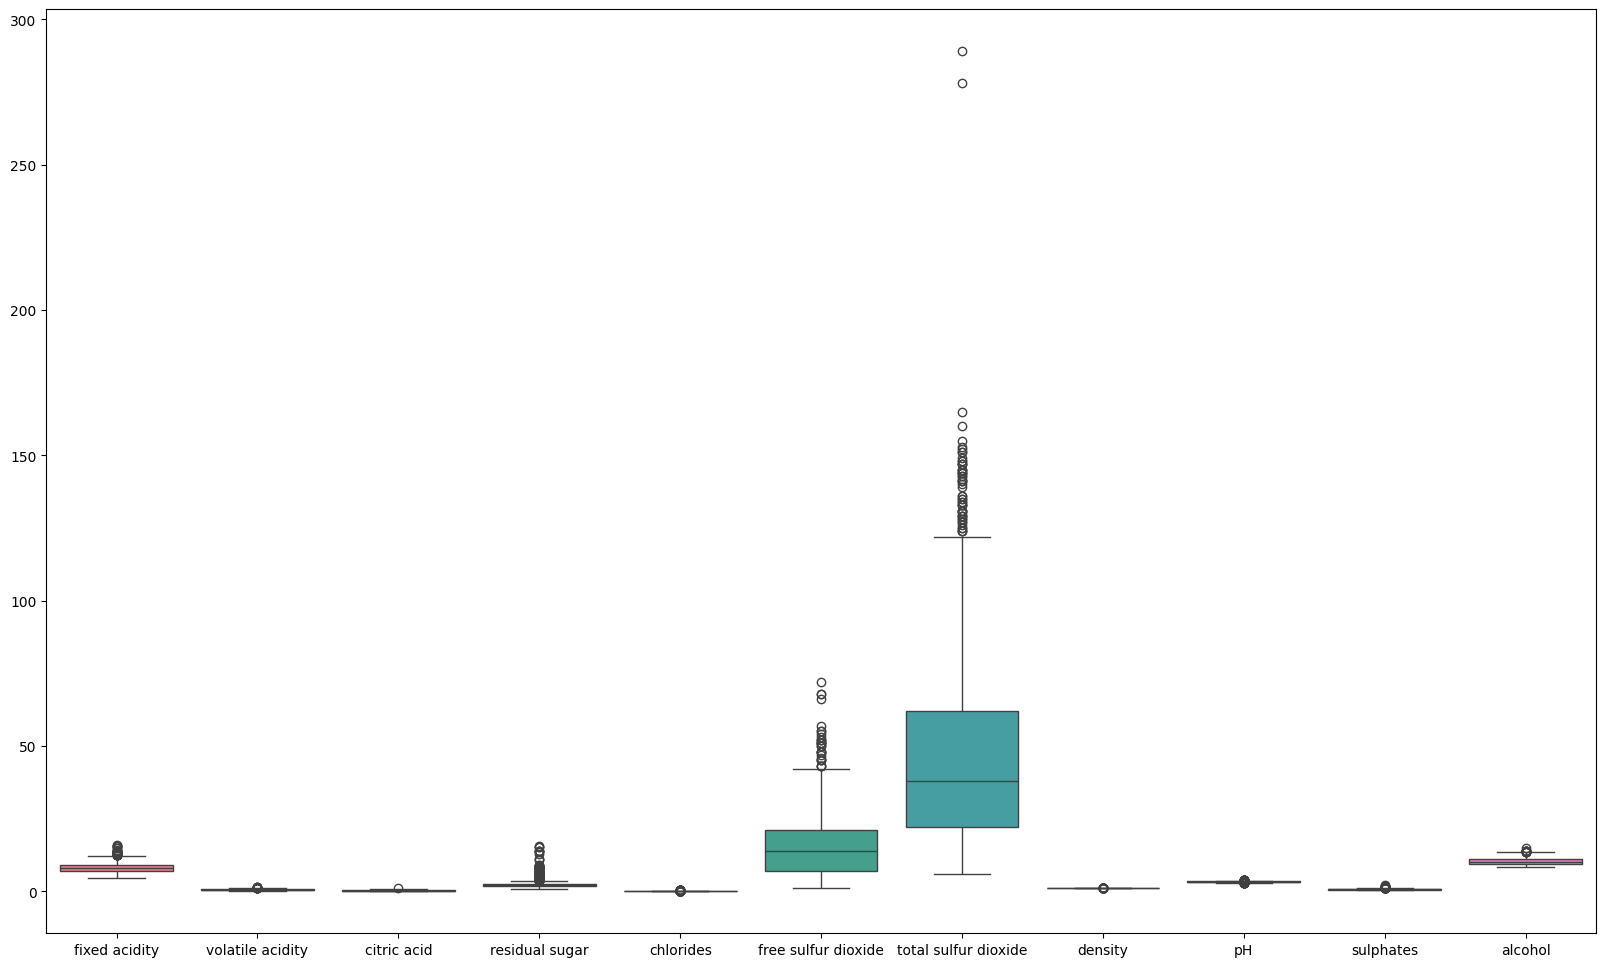

In [29]:
plt.figure(figsize=(20,12))
sns.boxplot(data=X)
plt.show


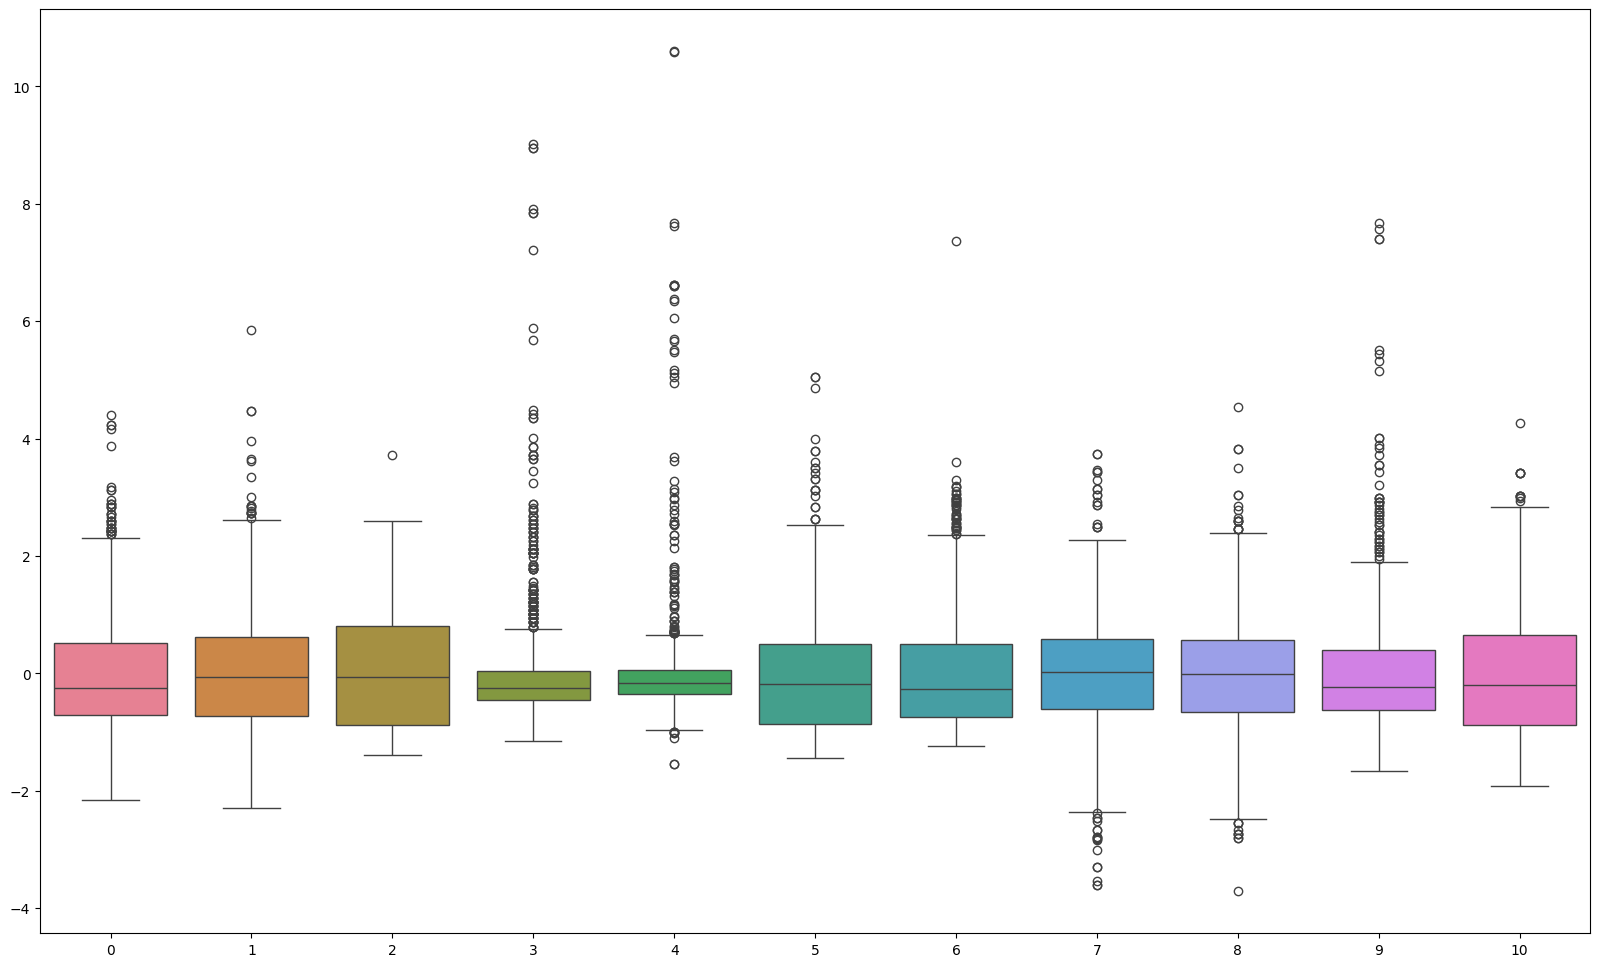

In [55]:
plt.figure(figsize=(20,12))
sns.boxplot(data=X_trained_transformed)
plt.show()


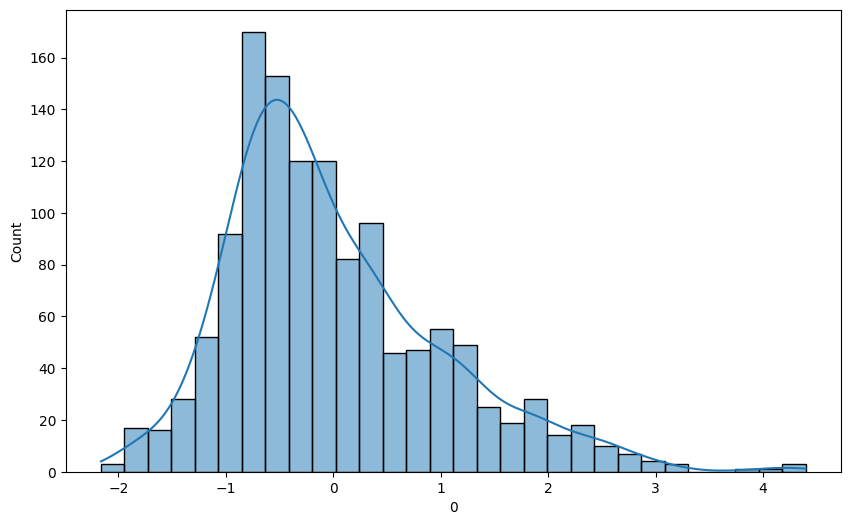

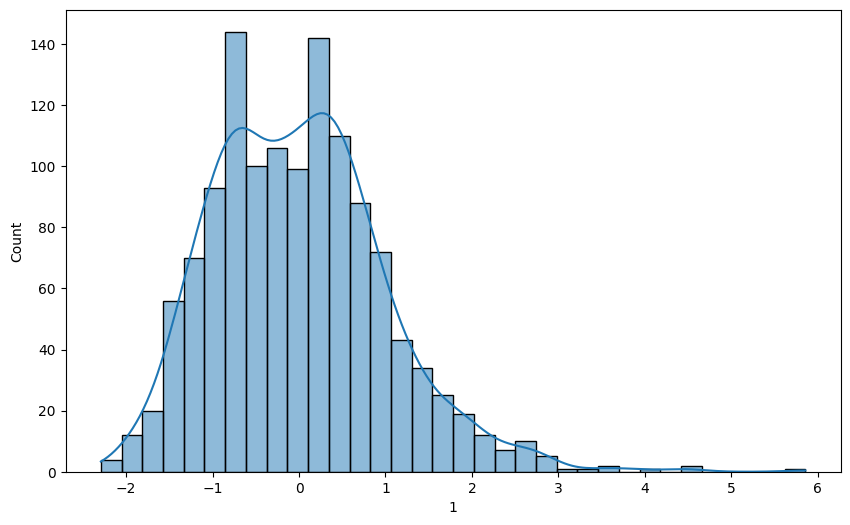

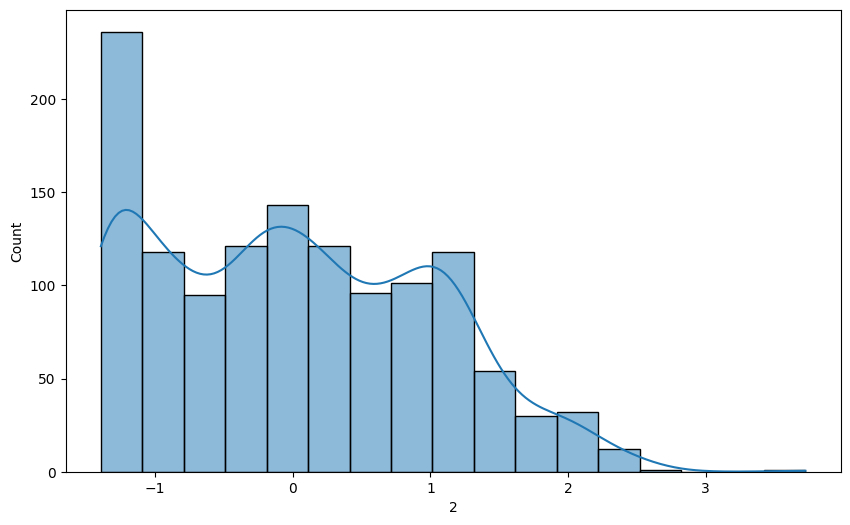

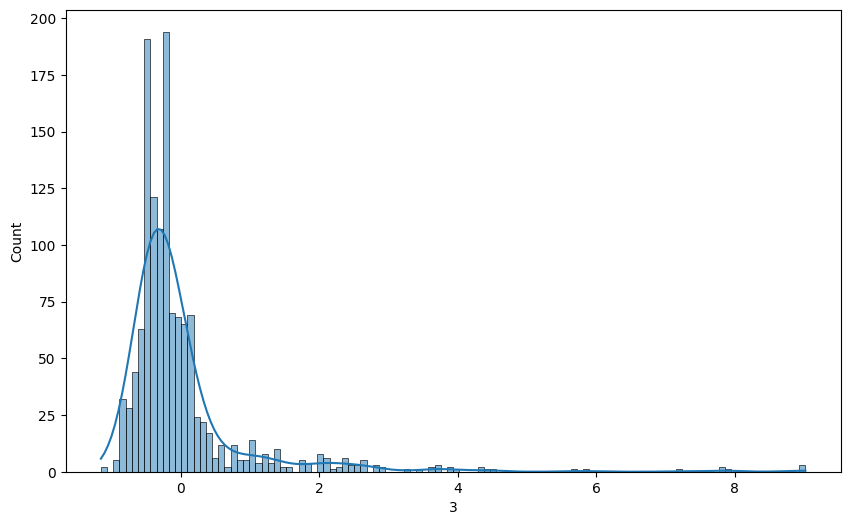

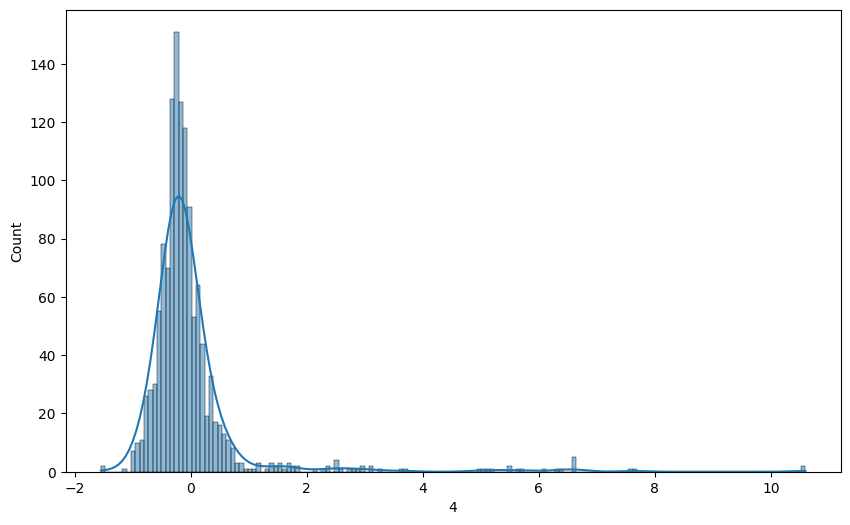

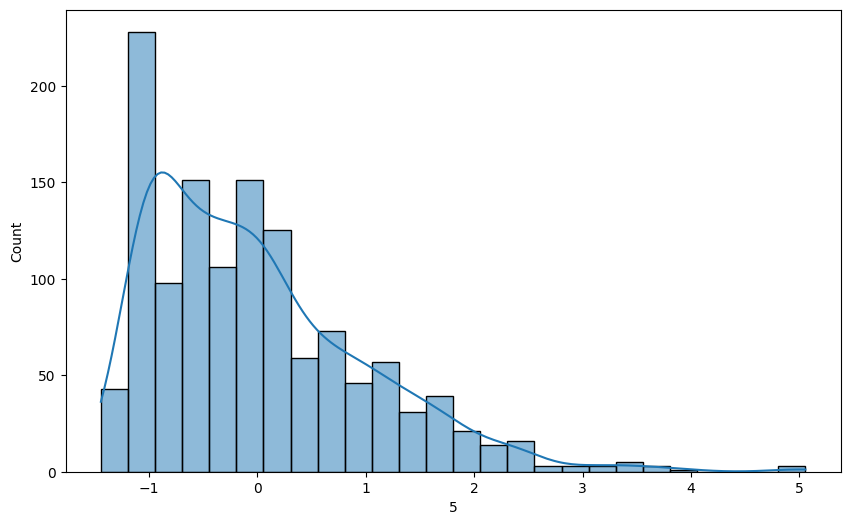

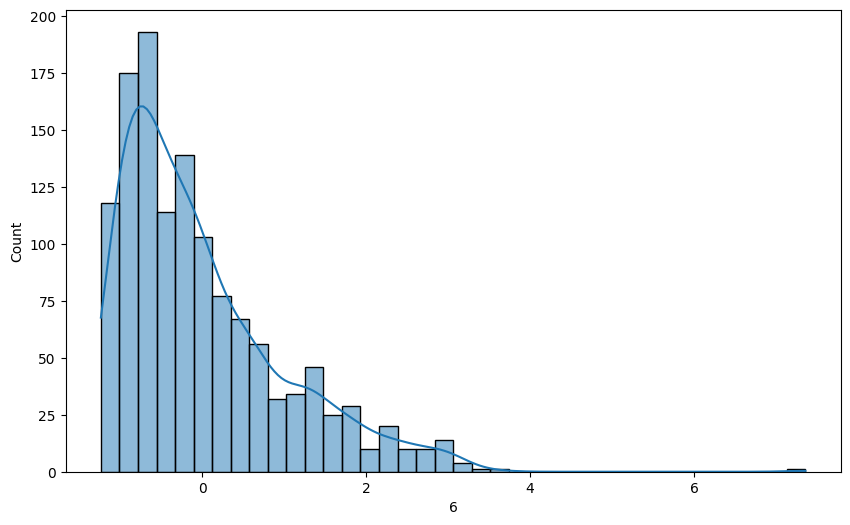

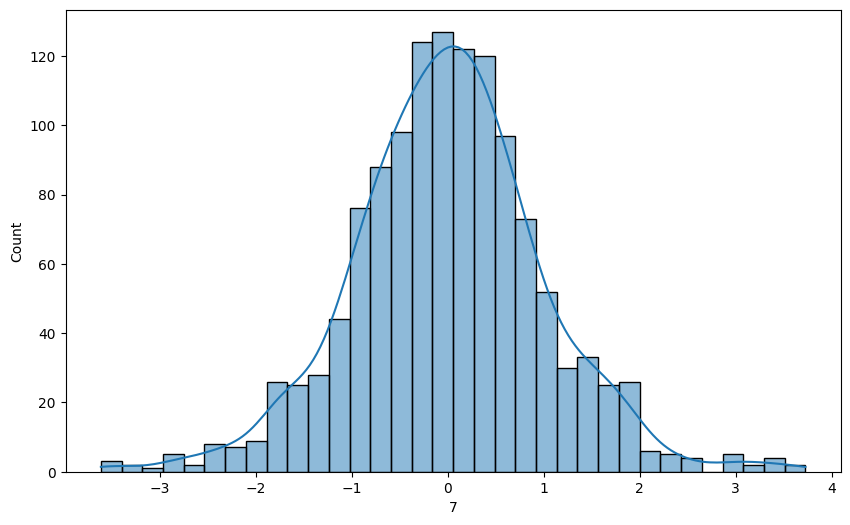

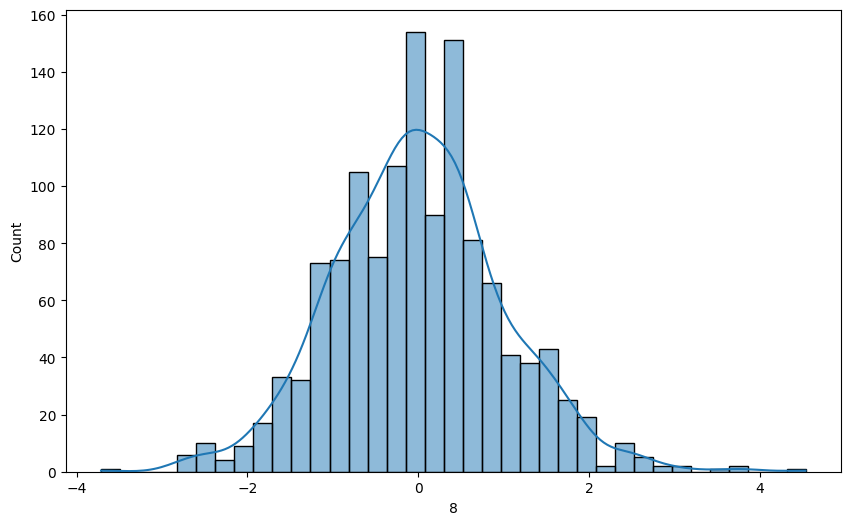

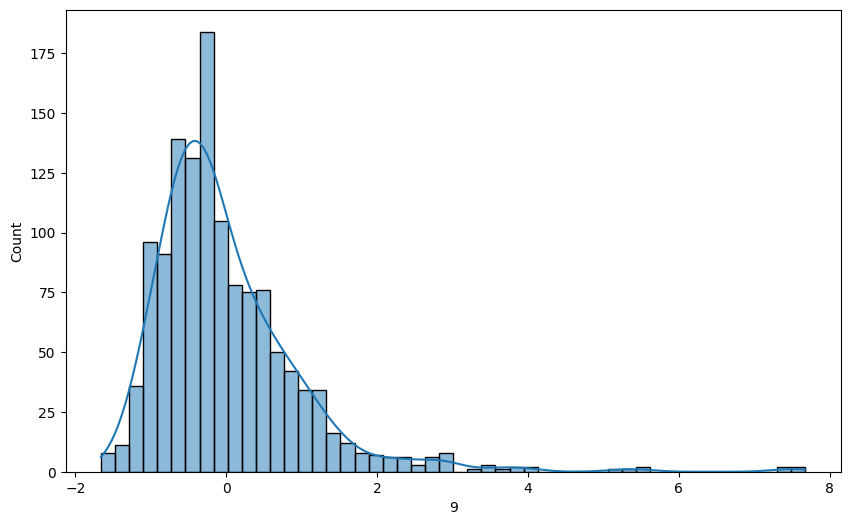

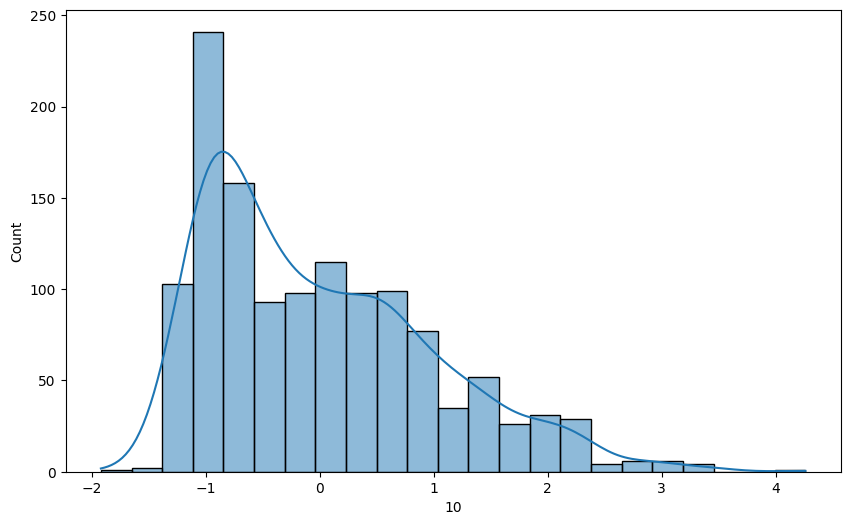

,0,1,2,3,4,5,6,7,8,9,10
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358


In [72]:
X_trained_transformed_df = pd.DataFrame(X_trained_transformed)
for i in range(0,11):
    plt.figure(figsize=(10,6))
    # print(data)
    sns.histplot(X_trained_transformed_df[i], kde=True)
    plt.show()
X_trained_transformed_df.head()

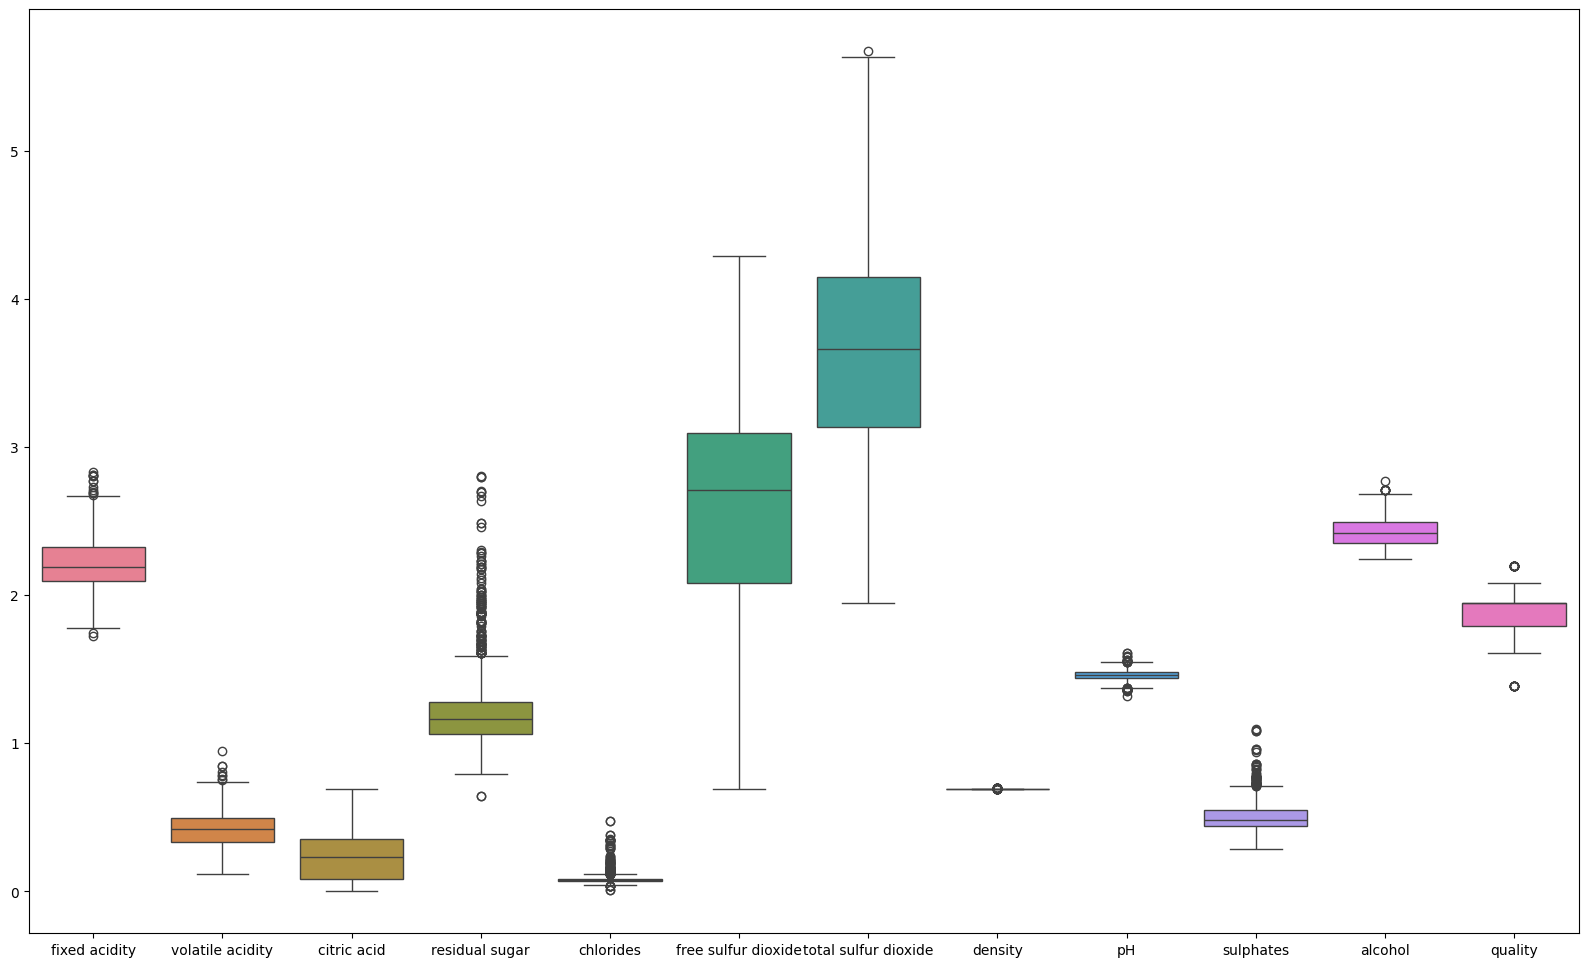

In [48]:

# df_log_transformed = np.log1p(df)
# plt.figure(figsize=(20,12))
# sns.boxplot(data = df_log_transformed)
# plt.show()

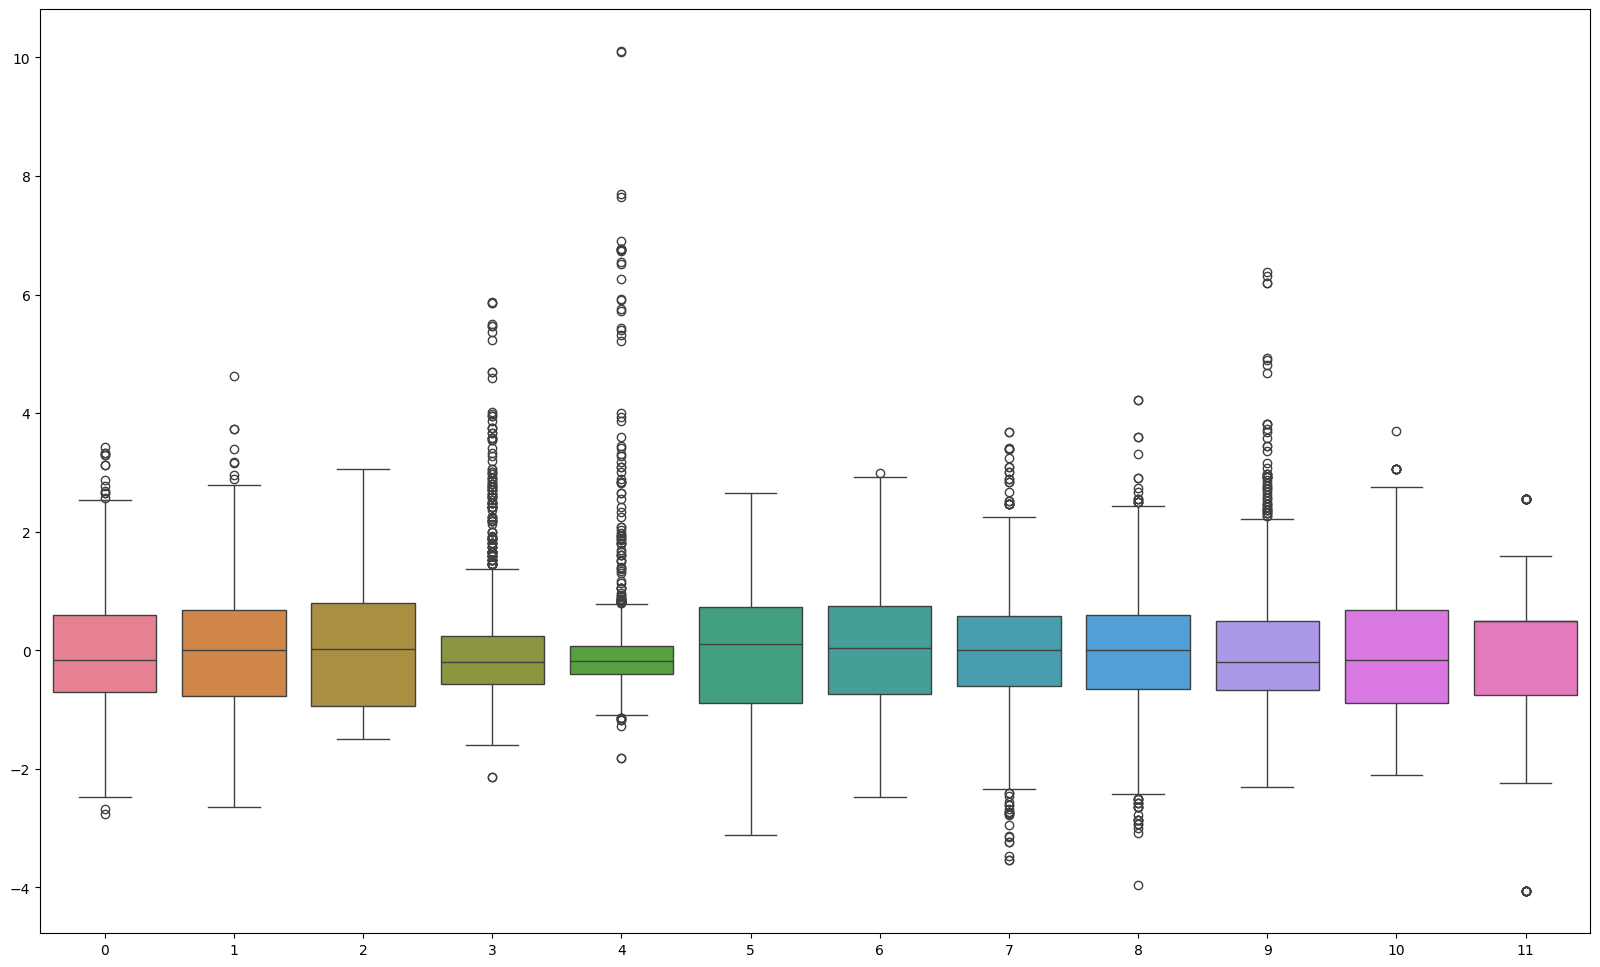

In [49]:
df_log_standard_transformed = scaler.fit_transform(df_log_transformed)
plt.figure(figsize=(20,12))
sns.boxplot(data=df_log_standard_transformed)
plt.show()

In [37]:
from sklearn.neural_network import  MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500,500,500))
mlp.fit(X_trained_log_transformed, y_train)
y_preds = mlp.predict(X_test_log_transformed)
print(accuracy_score(y_test, y_preds)*100)

56.56250000000001
